# Import Packages

In [7]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score,confusion_matrix, mean_absolute_error , r2_score , mean_squared_error, mean_absolute_percentage_error
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
# from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings("ignore")

# Process Data

In [8]:
# Read the CSV file into a DataFrame
url = 'https://github.com/Rising-Stars-by-Sunshine/STATS201_Jiahe_Final/raw/main/data/raw%20data.csv'
df = pd.read_csv(url, index_col=None)
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [9]:
# getting the dataset's rows and columns
df.shape

(1000, 26)

In [10]:
# getting information about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [11]:
#Check types for all the columns using dtypes
df.dtypes

index                        int64
Patient Id                  object
Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object

# Encoding

"Level of Lung Cancer" is encoded as numeric of 0,1,2.

In [12]:
# Define a mapping dictionary for the levels
level_mapping = {'Low': 0, 'Medium': 1, 'High': 2}

# Map the levels to numerical values
df['Target'] = df['Level'].map(level_mapping)

# Display the first few rows of the DataFrame
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,Target
0,0,P1,33,1,2,4,5,4,3,2,...,4,2,2,3,1,2,3,4,Low,0
1,1,P10,17,1,3,1,5,3,4,2,...,3,7,8,6,2,1,7,2,Medium,1
2,2,P100,35,1,4,5,6,5,5,4,...,7,9,2,1,4,6,7,2,High,2
3,3,P1000,37,1,7,7,7,7,6,7,...,2,3,1,4,5,6,7,5,High,2
4,4,P101,46,1,6,8,7,7,7,6,...,2,4,1,4,2,4,2,3,High,2


# Correlation

Here, the correlation between any of the two variables are calculated.

<Axes: >

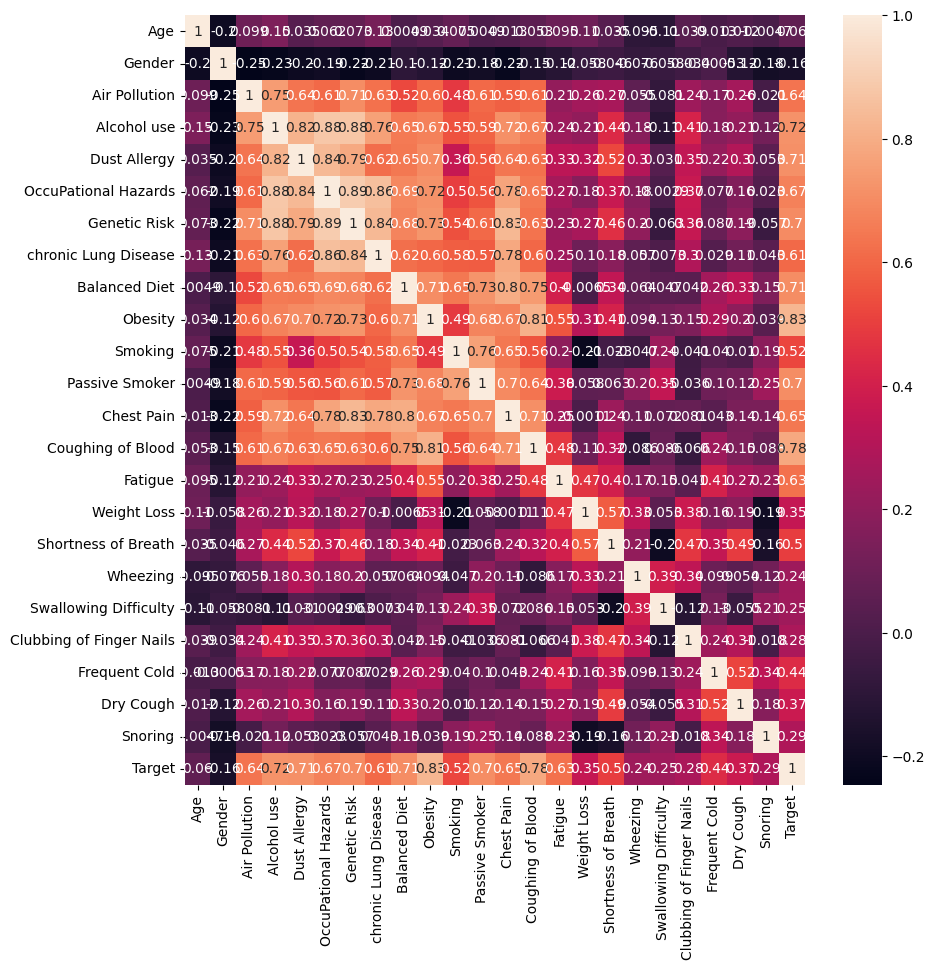

In [13]:
df1 = df.drop(["Level","Patient Id","index"],axis=1)
plt.subplots(figsize = (10, 10                      ))
sns.heatmap(df1.corr(), annot = True)

<Axes: >

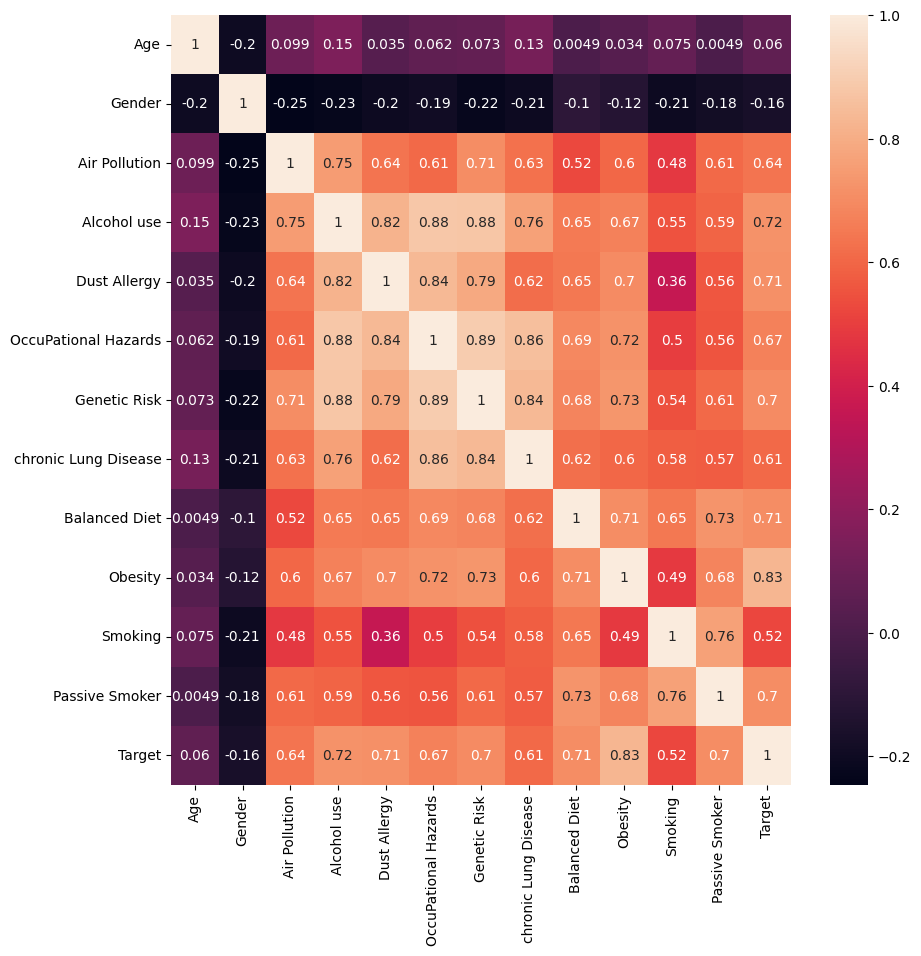

In [14]:
# Drop the specified columns from the DataFrame
df1 = df.drop(["Level", "Patient Id", "index", "Chest Pain", "Coughing of Blood", "Fatigue", "Weight Loss",
               "Shortness of Breath", "Wheezing", "Swallowing Difficulty", "Clubbing of Finger Nails",
               "Frequent Cold", "Dry Cough", "Snoring"], axis=1)
plt.subplots(figsize = (10, 10))
sns.heatmap(df1.corr(), annot = True)

# Only Smoking Related

The varible of "Smoking" and "Passive Smoker" are considered as smoking related variables, and I am going to use these variables to predict the level of lung cancer.

In [15]:
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,Target
0,0,P1,33,1,2,4,5,4,3,2,...,4,2,2,3,1,2,3,4,Low,0
1,1,P10,17,1,3,1,5,3,4,2,...,3,7,8,6,2,1,7,2,Medium,1
2,2,P100,35,1,4,5,6,5,5,4,...,7,9,2,1,4,6,7,2,High,2
3,3,P1000,37,1,7,7,7,7,6,7,...,2,3,1,4,5,6,7,5,High,2
4,4,P101,46,1,6,8,7,7,7,6,...,2,4,1,4,2,4,2,3,High,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,3,2,7,8,2,4,5,3,High,2
996,996,P996,37,2,6,8,7,7,7,6,...,6,5,7,2,4,3,1,4,High,2
997,997,P997,25,2,4,5,6,5,5,4,...,7,9,2,1,4,6,7,2,High,2
998,998,P998,18,2,6,8,7,7,7,6,...,2,4,1,4,2,4,2,3,High,2


In [16]:
# Split data between predictors and output variable
x0 = x0 = df[["Smoking","Passive Smoker"]].values
y0 = df.Target.values

In [17]:
# Randomly split the dataset into train and test data.
x0_train, x0_test,y0_train,y0_test = train_test_split(x0,y0,test_size=0.2,random_state=42)

In [18]:
x0_train

array([[3, 3],
       [8, 7],
       [3, 3],
       ...,
       [1, 4],
       [2, 3],
       [2, 3]])

In [19]:
y0_train

array([1, 2, 1, 1, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 2, 2, 2, 1, 1, 0, 1, 2,
       2, 0, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 1, 1, 1, 2, 2, 2, 1, 2,
       1, 2, 2, 1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 2, 0, 2, 1, 2, 2, 0, 0, 2,
       2, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 0, 1, 0, 1, 2, 2, 0, 2, 0, 1, 2,
       2, 0, 0, 1, 1, 2, 1, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 1, 2, 2, 1,
       0, 1, 1, 0, 2, 1, 0, 1, 0, 0, 2, 0, 1, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       0, 1, 0, 2, 0, 2, 2, 2, 0, 1, 0, 0, 0, 2, 2, 1, 1, 0, 1, 0, 0, 1,
       1, 2, 1, 2, 2, 0, 0, 1, 1, 0, 0, 2, 2, 1, 0, 1, 0, 0, 1, 0, 0, 2,
       0, 1, 2, 0, 1, 0, 1, 1, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 2,
       2, 0, 0, 1, 2, 0, 1, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 0, 2, 0, 1, 2,
       1, 2, 1, 1, 1, 1, 2, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 0, 1, 1, 0, 1,
       0, 2, 2, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 1, 2, 0,
       0, 2, 0, 0, 2, 0, 2, 2, 2, 1, 2, 1, 2, 2, 0,

In [20]:
# Run an logistic regression
lr = LogisticRegression()

lr.fit(x0_train, y0_train)


LogisticRegression()

In [21]:
# See score
lr.score(x0_train , y0_train)

0.69375

In [22]:
# See score
lr.score(x0_test, y0_test)

0.76

In [26]:
# Prediction
y0_pred=lr.predict(x0_test)
data=pd.DataFrame({'y_Test  ':y0_test,'y_pred  ':y0_pred})
data[:5]

,y_Test,y_pred
0,1,1
1,1,1
2,1,1
3,2,2
4,1,1


In [27]:
# See accuracy
accuracy = accuracy_score(y0_test, y0_pred)
print("Accuracy rate:", accuracy)

Accuracy rate: 0.76


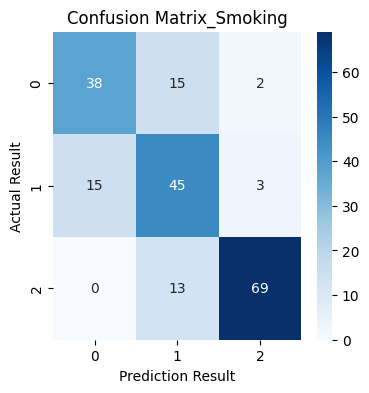

In [28]:
# Evaluation using confusion matrix
plt.figure(figsize=(4, 4))
cm=confusion_matrix(y0_test, y0_pred)
sns.heatmap(cm,annot=True, cmap='Blues')
plt.title('Confusion Matrix_Smoking')
plt.xlabel('Prediction Result')
plt.ylabel('Actual Result')
plt.show()

# Only Consider Environemental issues

In [29]:
# Split data between predictors and output variable
# Only consider environmental issues
x = df[["Air Pollution","OccuPational Hazards"]].values
y = df.Target.values

In [30]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Run Logistic Regression


In [31]:
# Run a logistic regression
lr = LogisticRegression()
lr.fit(x_train , y_train)

LogisticRegression()

In [32]:
# See scores
lr.score(x_train , y_train)

0.62125

In [33]:
lr.score(x_test , y_test)

0.655

In [34]:
# Prediction
y_pred=lr.predict(x_test)
data=pd.DataFrame({'y_Test  ':y_test,'y_pred  ':y_pred})
data[:5]

,y_Test,y_pred
0,1,1
1,1,2
2,1,2
3,2,2
4,1,1


In [35]:
accuracy1 = accuracy_score(y_test, y_pred)
print("Accuracy rate:",accuracy1)

Accuracy rate: 0.655


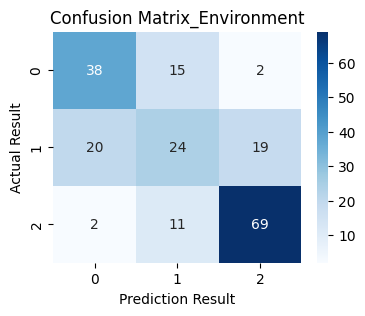

In [36]:
# Evaluation
plt.figure(figsize=(4, 3))
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True, cmap='Blues')
plt.title('Confusion Matrix_Environment')
plt.xlabel('Prediction Result')
plt.ylabel('Actual Result')
plt.show()

# Only Consider Lifestyle Habit

Including "Alcohol Use" and "Balanced Diet"

In [37]:
# Split data between predictors and output variable
x1 = df[["Alcohol use","Balanced Diet"]].values
y1 = df.Target.values

In [38]:
# Split into train and test data
x1_train, x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.2,random_state=42)

In [39]:
# Run Logistic Regression
lr = LogisticRegression()
lr.fit(x1_train , y1_train)

LogisticRegression()

In [40]:
# See Score
lr.score(x1_train , y1_train)

0.66875

In [41]:
lr.score(x1_test , y1_test)

0.71

In [42]:
# See Prediction
y1_pred=lr.predict(x_test)
data=pd.DataFrame({'y_Test  ':y1_test,'y_pred  ':y1_pred})
data[:5]

,y_Test,y_pred
0,1,0
1,1,2
2,1,2
3,2,2
4,1,0


In [43]:
# See accuracy
accuracy2 = accuracy_score(y1_test, y1_pred)
print("Accuracy rate:",accuracy2)

Accuracy rate: 0.53


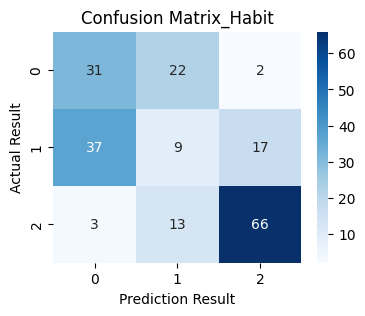

In [44]:
# Evaluation
plt.figure(figsize=(4, 3))
cm=confusion_matrix(y1_test, y1_pred)
sns.heatmap(cm,annot=True, cmap='Blues')
plt.title('Confusion Matrix_Habit')
plt.xlabel('Prediction Result')
plt.ylabel('Actual Result')
plt.show()

# Combined Prediction

In [63]:
# Split data between predictors and output variable
x9 = df.drop(["Level", "Patient Id", "index", "Chest Pain", "Coughing of Blood", "Fatigue", "Weight Loss","Shortness of Breath", "Wheezing", "Swallowing Difficulty", "Clubbing of Finger Nails",
              "Frequent Cold", "Dry Cough", "Snoring", "Target"], axis=1).values
y9 = df.Target.values

In [64]:
# Split into train and test data
x9_train, x9_test,y9_train,y9_test = train_test_split(x9,y9,test_size=0.2,random_state=42)

In [65]:
# Run Logistic Regression
lr = LogisticRegression()
lr.fit(x9_train , y9_train)

LogisticRegression()

In [66]:
# See Score
lr.score(x9_train , y9_train)

0.83

In [69]:
# See Prediction
y9_pred=lr.predict(x9_test)
data=pd.DataFrame({'y_Test  ':y9_test,'y_pred  ':y9_pred})
data[:5]

,y_Test,y_pred
0,1,1
1,1,1
2,1,1
3,2,2
4,1,1


In [71]:
# See accuracy
accuracy9 = accuracy_score(y9_test, y9_pred)
print("Accuracy rate:",accuracy9)

Accuracy rate: 0.865


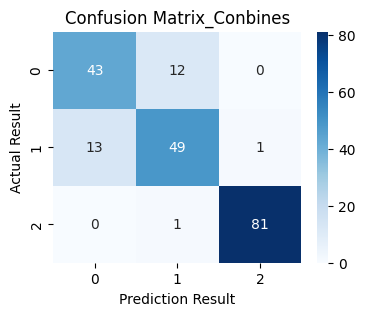

In [73]:
# Evaluation
plt.figure(figsize=(4, 3))
cm=confusion_matrix(y9_test, y9_pred)
sns.heatmap(cm,annot=True, cmap='Blues')
plt.title('Confusion Matrix_Conbines')
plt.xlabel('Prediction Result')
plt.ylabel('Actual Result')
plt.show()